In [55]:
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
from rasterio.plot import show
import rasterio.features
import rasterio.warp
import glob
import os
import rioxarray as xr
import pandas as pd
import geopandas as gpd
import numpy as np
from rasterio.enums import Resampling
from rasterio.crs import CRS
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.plot as ep
from shapely.geometry import mapping
import subprocess
from osgeo import gdal
import multiprocessing as mp
from typing import List, Any, Sequence, Tuple
import xarray as xarray
from numpy import savetxt
from matplotlib.colors import colorConverter
import scipy



%matplotlib inline


### Time Series Comparisons

In [56]:
#imports

In [57]:
#landcover fc
loss_fc = '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/'

# Make a search criteria to select the files to loop over
search_criteria_fc = "*fc.npy"
r = os.path.join(loss_fc, search_criteria_fc)
print(r)


# glob function can be used to list files from a directory with specific criteria
loss_fc_img = glob.glob(r)

# Files that were found:
print(loss_fc_img)

/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/*fc.npy
['/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2014_Landcover_Change_Map_fc.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2015_Landcover_Change_Map_fc.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2016_Landcover_Change_Map_fc.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2017_Landcover_Change_Map_fc.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2018_Landcover_Change_Map_fc.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2019_Landcover_Change_Map_fc.npy']


In [58]:
##landcover sc

loss_sc = '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/'

# Make a search criteria to select the files to loop over
search_criteria_sc = "*sc.npy"
r = os.path.join(loss_sc, search_criteria_sc)
print(r)


# glob function can be used to list files from a directory with specific criteria
loss_sc_img = glob.glob(r)

# Files that were found:
print(loss_sc_img)

/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/*sc.npy
['/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2014_Landcover_Change_Map_sc.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2015_Landcover_Change_Map_sc.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2016_Landcover_Change_Map_sc.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2017_Landcover_Change_Map_sc.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2018_Landcover_Change_Map_sc.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Figures/Landcover_Change_Maps/Landcover_Change_Maps_npy/PIREDD_2019_Landcover_Change_Map_sc.npy']


In [59]:
fc = np.load(loss_sc_img[5])
fc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
fc_loss = []
for i in range(0,6):
    fc = np.load(loss_fc_img[i])
    loss_fc = np.count_nonzero(fc==1)
    fc_loss.append(loss_fc*((300*300)/1000000))

fc_loss

[1147.95, 236.34, 788.22, 779.76, 962.0999999999999, 764.1]

In [80]:
sc_loss = []
for i in range(0,6):
    sc = np.load(loss_sc_img[i])
    loss_sc = np.count_nonzero(sc==1)
    sc_loss.append(loss_sc*((300*300)/1000000))

sc_loss

[459.99, 273.96, 378.9, 208.70999999999998, 469.62, 246.95999999999998]

In [81]:
LC_loss = []
for i in range(0,6):
    Landcover_Loss = fc_loss[i] + sc_loss[i]
    LC_loss.append(Landcover_Loss)

LC_loss

[1607.94, 510.29999999999995, 1167.12, 988.47, 1431.7199999999998, 1011.06]

In [82]:
#hansen
hansen_loss_year = '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/loss_year/resampled'

# Make a search criteria to select the files to loop over
search_criteria = "*.npy"
r = os.path.join(hansen_loss_year, search_criteria)
print(r)


# glob function can be used to list files from a directory with specific criteria
hansen_loss_img = glob.glob(r)

# Files that were found:
print(hansen_loss_img)

/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/loss_year/resampled/*.npy
['/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/loss_year/resampled/loss_year_14.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/loss_year/resampled/loss_year_15.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/loss_year/resampled/loss_year_16.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/loss_year/resampled/loss_year_17.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/loss_year/resampled/loss_year_18.npy', '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/Hansen_Results/loss_year/resampled/loss_year_19.npy']


In [83]:
Hansen_loss = []
for i in range(0,6):
    hansen = np.load(hansen_loss_img[i])
    loss_hansen = np.count_nonzero(hansen ==1)
    Hansen_loss.append(loss_hansen*((300*300)/1000000))

Hansen_loss

[220.76999999999998, 117.27, 206.1, 257.4, 294.39, 171.98999999999998]

In [84]:
#landtrendr
LandTrendr_path = '/gws/nopw/j04/ai4er/users/jl2182/data/Mres_Data/LandTrendr_Results/PIREDD_Plateau/Change_Maps/PIREDD_Plateau_year_of_change_map.tif'
LandTrendr = xr.open_rasterio(LandTrendr_path)

In [85]:
LandTrendr_loss = []
for i in range(2014,2020):
    loss_lt = np.count_nonzero(LandTrendr == i)
    LandTrendr_loss.append(loss_lt*((30*30)/1000000))
    np.set_printoptions(precision=3)

LandTrendr_loss

[1041.5511, 31.9905, 92.0268, 11.6046, 154.7424, 273.1212]

In [86]:
pd.options.display.float_format = '{:,.2f}'.format

df = pd.DataFrame(list(zip(LC_loss, Hansen_loss, LandTrendr_loss)),
               columns =['Landcover (sq km)', 'Global Forest Change (sq km)', 'LandTrendr (sq km)'],index = [2014, 2015, 2016, 2017,2018,2019])
df

,Landcover (sq km),Global Forest Change (sq km),LandTrendr (sq km)
2014,"1,607.94",220.77,"1,041.55"
2015,510.30,117.27,31.99
2016,"1,167.12",206.10,92.03
2017,988.47,257.40,11.60
2018,"1,431.72",294.39,154.74
2019,"1,011.06",171.99,273.12


In [87]:
df.shape

(6, 3)

-11.394000000000018
9.678857142857142
-101.55188571428569


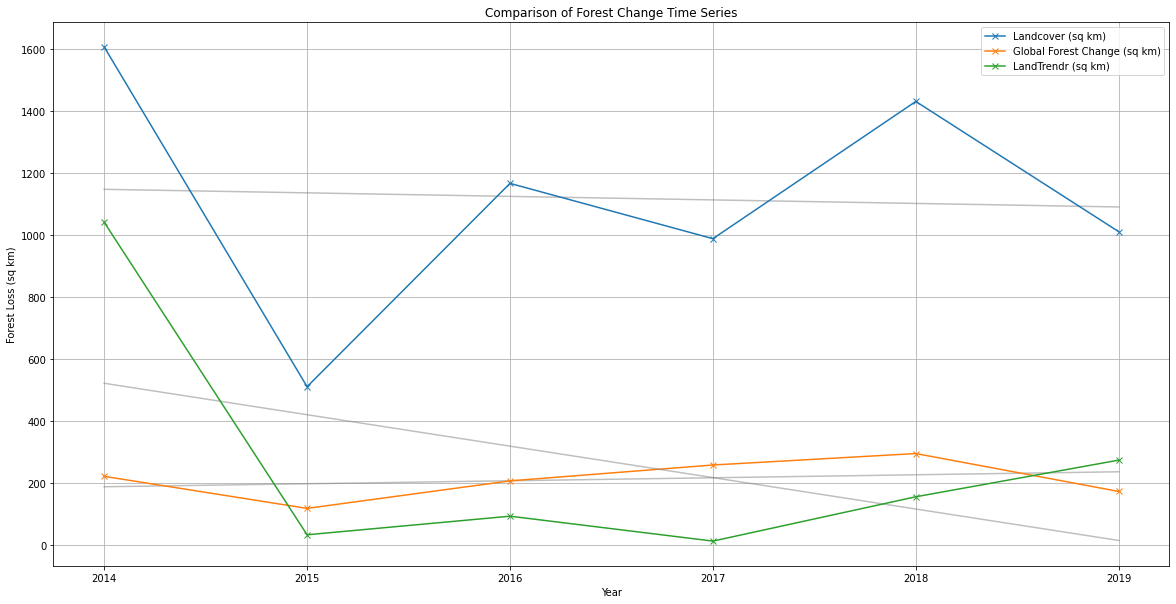

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

fig=plt.figure(figsize=(20,10))
columns = 3
rows = 2
for i in range(df.shape[1]):
    X = df.index.tolist()
    Y = df.iloc[:6,i]

    #plot data
    #fig = sns.regplot(data = df, x = X, y = Y)
    slope, intercept, r, p, std_err = stats.linregress(X, Y)
    def myfunc(x):
        return slope * x + intercept
    mymodel = list(map(myfunc, X))
    print(slope)
    plt.plot(X, mymodel, color = 'grey', alpha = 0.5)
    plt.plot(X, Y, marker = 'x', label = df.columns[i] )### what you want you can plot
    plt.grid()
    plt.title('Comparison of Forest Change Time Series')
    plt.ylabel('Forest Loss (sq km)')
    plt.xlabel('Year')
    plt.legend()

plt.savefig('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/LC_LT_GFC_Compariosn/Forest_Loss_Time_Series.png')
plt.show()

### Compariosns for LC method only

In [89]:
pd.options.display.float_format = '{:,.2f}'.format

df4 = pd.DataFrame(list(zip(sc_loss, fc_loss)),
               columns =['Shrubland to Cropland (sq km)', 'Forest to Cropland (sq km)'],index = [2014, 2015, 2016, 2017,2018,2019])
df4

,Shrubland to Cropland (sq km),Forest to Cropland (sq km)
2014,459.99,"1,147.95"
2015,273.96,236.34
2016,378.90,788.22
2017,208.71,779.76
2018,469.62,962.10
2019,246.96,764.10


In [90]:
df4.iloc[:,1:2]

,Forest to Cropland (sq km)
2014,"1,147.95"
2015,236.34
2016,788.22
2017,779.76
2018,962.10
2019,764.10


-18.52457142857143
7.130571428571416


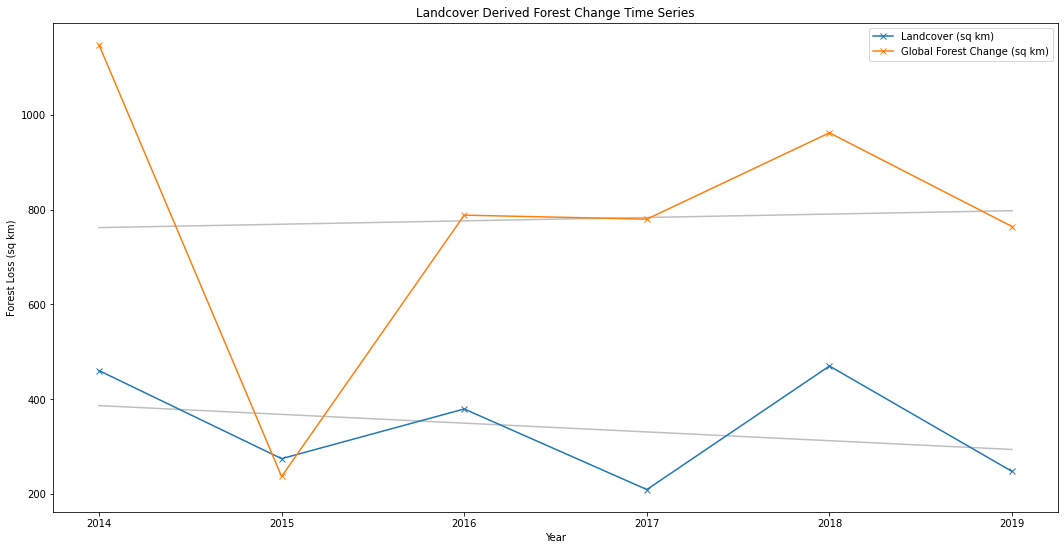

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

fig=plt.figure(figsize=(18,9))
for i in range(df4.shape[1]):
    X = df4.index.tolist()
    Y = df4.iloc[:6,i]

    #fig = sns.regplot(data = df, x = X, y = Y)
    slope, intercept, r, p, std_err = stats.linregress(X, Y)
    def myfunc(x):
        return slope * x + intercept
    mymodel = list(map(myfunc, X))
    print(slope)
    plt.plot(X, mymodel, color = 'grey', alpha = 0.5)
    plt.plot(X, Y, marker = 'x', label = df.columns[i] )### what you want you can plot
    plt.grid()
    plt.title('Landcover Derived Forest Change Time Series')
    plt.ylabel('Forest Loss (sq km)')
    plt.xlabel('Year')
    plt.legend()
#plt.plot(df4.iloc[:,:1], color = 'yellow')
#plt.plot(df4.iloc[:,1:2], color = 'orange')### what you want you can plot
#plt.grid()
#plt.title(df.columns[i])
#plt.ylabel('Forest Loss (sq m)')
#plt.xlabel('Year')
    

plt.savefig('/gws/nopw/j04/ai4er/users/jl2182/data/Figures/LC_Derived_Forest_Loss_Time_Series.png')
plt.show()